## packages


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

2024-01-31 18:46:21.210974: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data exploration

In [76]:
directory = "./Ogallery_dataset"
from Data import Data
data=Data(directory)

In [77]:
data.summary()

class 0 class 1     class 2 class 3 class 4 class 5 class 6  class 7  \
class   truck    boat  motorcycle   plane     bus     sea     car  bicycle   
count     424     391         463     731     425     697     643      639   

      class 8   class 9 class 10 class 11    class 12 class 13  class 14  
class  forest  building  glacier    train  helicopter   street  mountain  
count     687       658      590      393         517      797       760

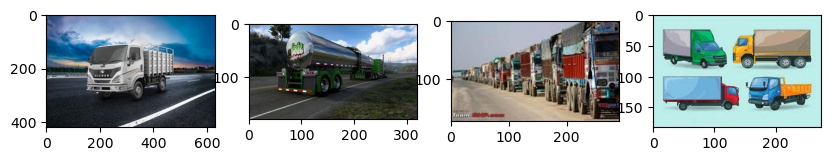

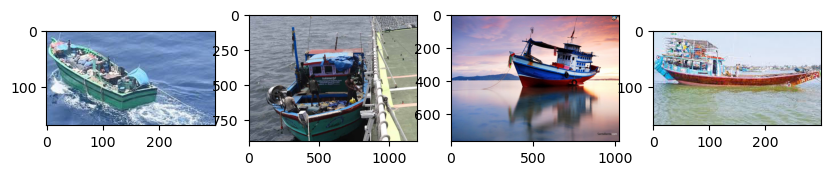

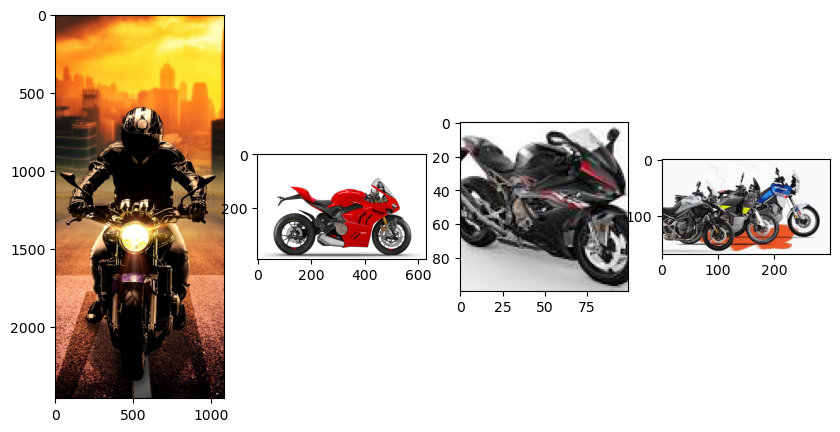

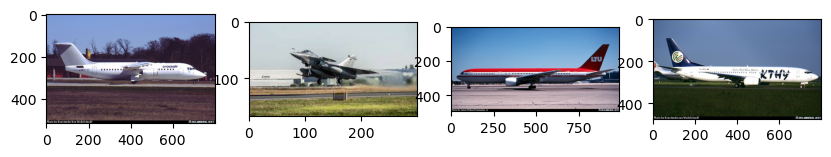

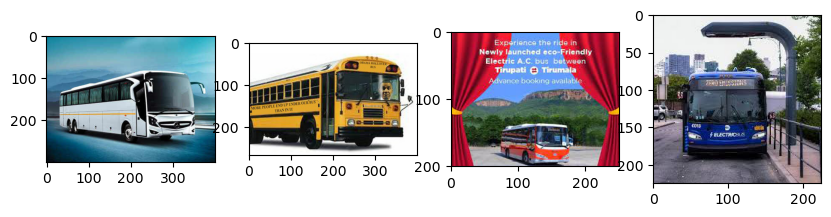

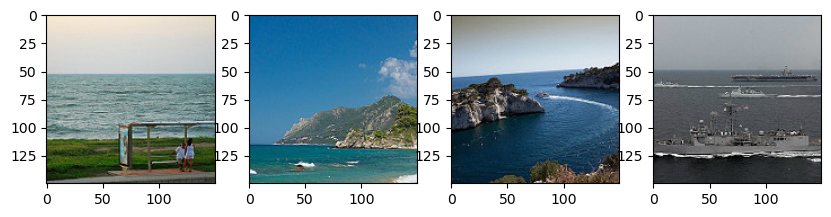

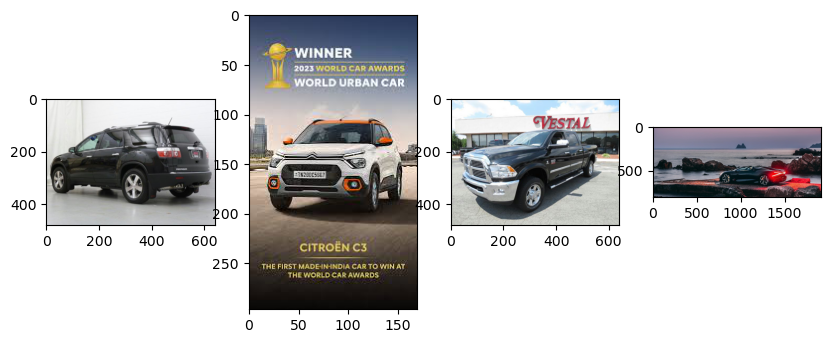

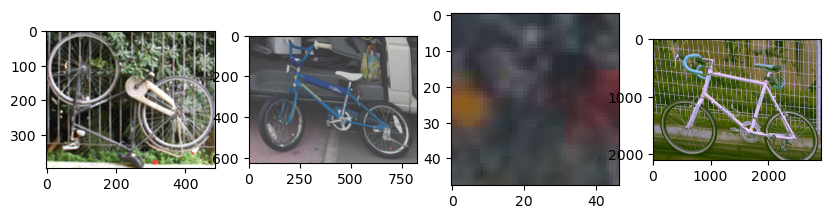

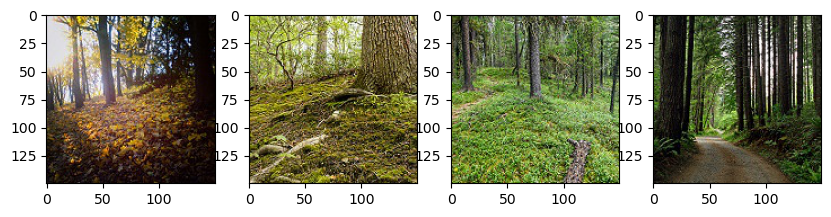

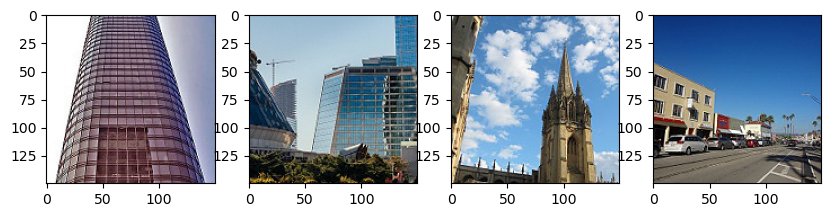

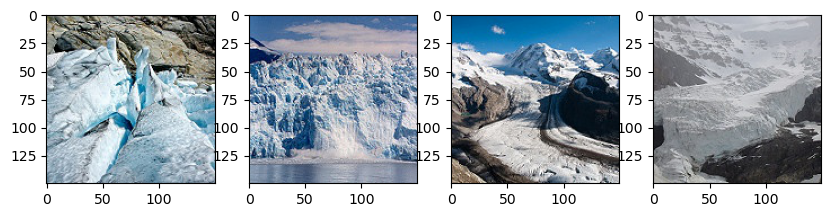

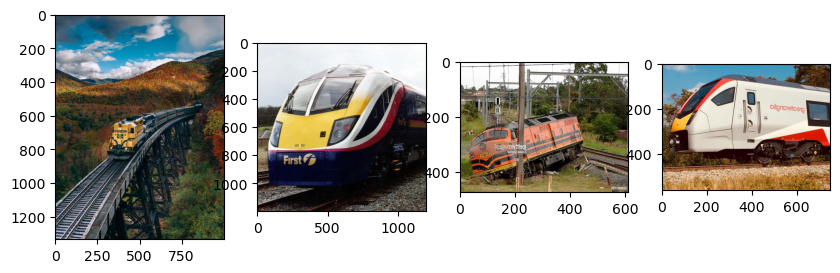

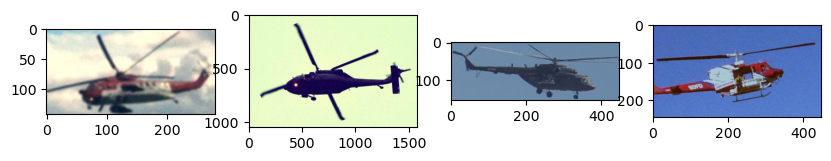

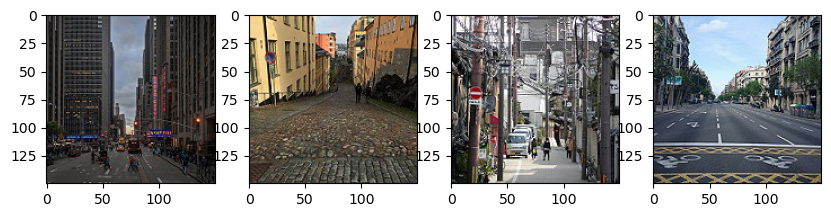

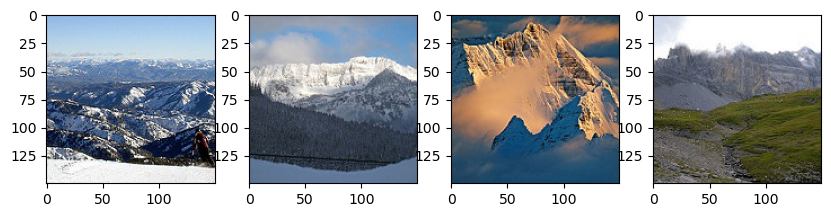

In [78]:
data.show(1,4)

In [79]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)
(train_dataset,validation_dataset) = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             label_mode='categorical',
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='both',
                                             seed=42)


Found 8815 files belonging to 15 classes.
Using 7052 files for training.
Using 1763 files for validation.


## Preprocessing

In [80]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [81]:
preprocess_input()

TypeError: preprocess_input() missing 1 required positional argument: 'x'

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = True
fine_tune_at = 120

#freeze 
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
    

inputs = tf.keras.Input(shape=IMG_SHAPE) 
x = preprocess_input(inputs) 
x = base_model(x) 
x = tf.keras.layers.GlobalAveragePooling2D()(x) 
x = tfl.Dropout(.2)(x)
outputs = tf.keras.layers.Dense(15,activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=4e-5),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])



In [ ]:
model.summary()

In [82]:
model_fit = model.fit(train_dataset, validation_data=validation_dataset, epochs=15)

Epoch 1/15


2024-01-31 16:00:43.514685: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [7052]
	 [[{{node Placeholder/_0}}]]
2024-01-31 16:00:43.516761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7052]
	 [[{{node Placeholder/_4}}]]


221/221 [==============================] - ETA: 0s - loss: 0.6011 - accuracy: 0.8307

2024-01-31 16:02:50.751503: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1763]
	 [[{{node Placeholder/_4}}]]
2024-01-31 16:02:50.752673: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1763]
	 [[{{node Placeholder/_4}}]]


221/221 [==============================] - 154s 676ms/step - loss: 0.6011 - accuracy: 0.8307 - val_loss: 0.5105 - val_accuracy: 0.8406
Epoch 2/15
221/221 [==============================] - 165s 731ms/step - loss: 0.3021 - accuracy: 0.9081 - val_loss: 0.4104 - val_accuracy: 0.8673
Epoch 3/15
221/221 [==============================] - 143s 623ms/step - loss: 0.2150 - accuracy: 0.9339 - val_loss: 0.3516 - val_accuracy: 0.8780
Epoch 4/15
221/221 [==============================] - 154s 681ms/step - loss: 0.1474 - accuracy: 0.9577 - val_loss: 0.3430 - val_accuracy: 0.8735
Epoch 5/15
221/221 [==============================] - 158s 694ms/step - loss: 0.1142 - accuracy: 0.9655 - val_loss: 0.3437 - val_accuracy: 0.8752
Epoch 6/15
221/221 [==============================] - 171s 757ms/step - loss: 0.0864 - accuracy: 0.9752 - val_loss: 0.3487 - val_accuracy: 0.8803
Epoch 7/15
221/221 [==============================] - 182s 801ms/step - loss: 0.0599 - accuracy: 0.9855 - val_loss: 0.3323 - val_accura

In [67]:
from pathlib import Path
import imghdr
import os
for dir_name in os.listdir("./Ogallery_dataset/"):
    data_dir="./Ogallery_dataset/"+dir_name
    image_extensions = [".png", ".jpg","jpeg"]  # add there all your images file extensions

    img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png","jpg"]
    for filepath in Path(data_dir).rglob("*"):
        if filepath.suffix.lower() in image_extensions:
            img_type = imghdr.what(filepath)
            if img_type is None:
                print(f"{filepath} is not an image")
                os.system(f"rm {filepath}")
            elif img_type not in img_type_accepted_by_tf:
                print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
                os.system(f"rm {filepath}")

Ogallery_dataset/truck/18-Wheeler-Truck-Open-Body.jpg is not an image
Ogallery_dataset/truck/truck-4.jpg is not an image
Ogallery_dataset/truck/profile1662382156.jpg is not an image
Ogallery_dataset/truck/semi-semitrailer-truck-tractor-highway.jpg is not an image
Ogallery_dataset/truck/Buying-used-truck-image-1.jpg is not an image
Ogallery_dataset/truck/profile1662380948.jpg is not an image
Ogallery_dataset/truck/Tipper-Trucks.jpg is a webp, not accepted by TensorFlow
Ogallery_dataset/truck/american-style-truck-on-freeway-260nw-528660739.jpg is not an image
Ogallery_dataset/truck/2022-ford-f-series-super-duty.jpg is not an image
Ogallery_dataset/truck/truck-container-on-highway-cargo-260nw-1197587089.jpg is not an image
Ogallery_dataset/truck/profile1673251480.jpg is not an image
Ogallery_dataset/motorcycle/best-looking-motorcycles-ducati-xdiavel-black-star.jpg is not an image
Ogallery_dataset/motorcycle/best-touring-motorcycles-2022.jpg is not an image
Ogallery_dataset/motorcycle/1200

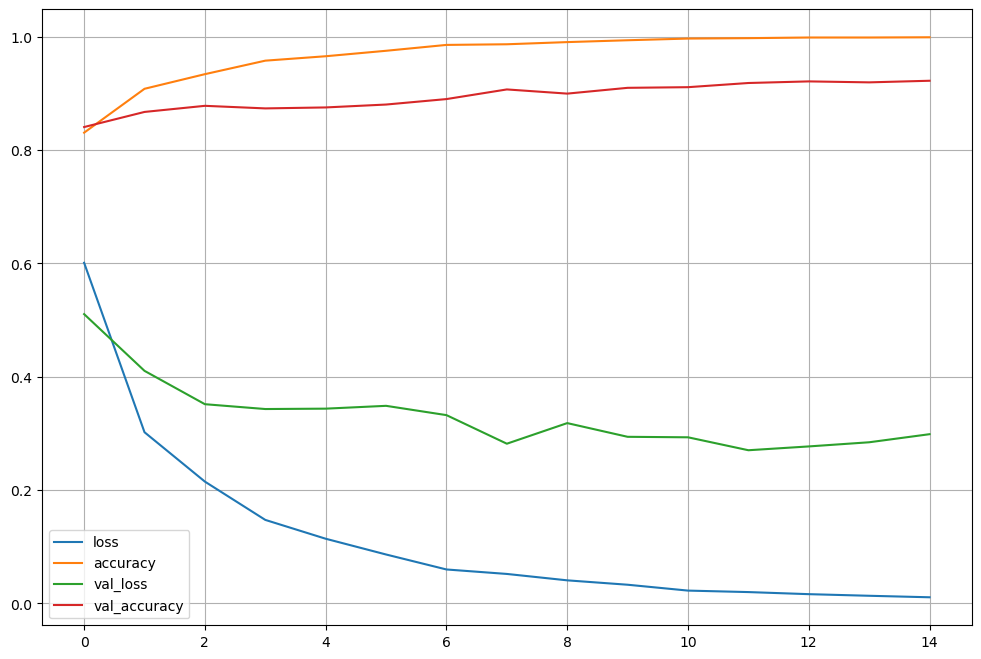

In [85]:
pd.DataFrame(model_fit.history).plot(figsize=(12,8))
plt.grid(True)
plt.show()

In [83]:
model.save("ogalleryv1.h5")

In [84]:
model.save("ogalleryv1")

2024-01-31 16:43:16.048220: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1280]
	 [[{{node inputs}}]]
2024-01-31 16:43:19.526520: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1280]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: ogalleryv1/assets


INFO:tensorflow:Assets written to: ogalleryv1/assets


In [8]:
from tensorflow import keras
savedModel = keras.models.load_model("ogalleryv1.h5")

In [7]:
#sorted(os.listdir("./Ogallery_dataset/"))

In [27]:
from PIL import Image
import numpy as np
from skimage import transform
def predict(filename):
    classes=['bicycle','boat','building','bus','car','forest',
             'glacier','helicopter','motorcycle', 'mountain',
             'plane','sea','street','train','truck']
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')
    np_image = transform.resize(np_image, (160, 160, 3))
    np_image = np.expand_dims(np_image, axis=0)
    pn=np.argmax(savedModel.predict(np_image))
    conf=np.max(savedModel.predict(np_image))
    p=classes[pn]
    if conf>.60:
        return p
    else:
        return None



In [32]:
x=predict('spotmini-1200x630.jpg')

1/1 [==============================] - 0s 34ms/step


In [1]:
from MobileNet import Model


2024-02-01 11:42:52.890616: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
x=[1,2,3,4,5]
x.pop()

5

In [2]:
model=Model('First_F-35_headed_for_USAF_service.jpg',.60)

In [5]:
s=model.predict()

1/1 [==============================] - 0s 35ms/step


In [6]:
print(s)

plane


In [11]:
x[-1]

4